# Анализ оттока клиентов банка

**Материалы**

1. [Презентация](https://drive.google.com/file/d/1H29YSkvRy_5--gpIl_HmDoQiUaKptL34/view?usp=sharing)
2. [Дашборд](https://public.tableau.com/app/profile/ivan.konovalov/viz/_16400224736620/sheet2?publish=yes)

**Задача:** исследовать данные, составить портрет клиентов, склонных к уходу, проверить гипотезы.

**План работы**:
1. Изучить данные:
    - применить методы `info`, `head`, `describe`;
    - сделать первые выводы о данных и распределении: есть ли выбросы, пропуски, дубликаты, какие типы у данных, правильно ли называются столбцы;
2. Предобработать данные (если потребуется):
    - изучить и обработать пропуски;
    - привести данные к нужному типу;
    - удалить дубликаты.
3. Визуализировать данные:
    - построить гистограммы;
    - построить диаграммы размаха.
4. Составить портрет уходящих пользователей:
    - визуализировать распределение параметров отдельно для ушедших и неушедших клиентов;
    - посчитать средние значения параметров для ушедших и неушедших клиентов.
5. Сформулировать и проверить гипотезы:
    - проверить нормальность распределения;
    - проверить гомогенность дисперсий;
    - сформулировать нулевую и альтернативную гипотезы;
    - зафиксировать критический уровень значимости;
    - проверить гипотезы при помощи статистических критериев.
6. Написать итоговые выводы.
7. Сделать презентацию и дашборд.

### Изучаем данные

In [3]:
# импортируем все необходимые для работы библиотеки
import pandas as pd # для работы с данными
import numpy as np # для работы с числами
import seaborn as sns # для визуализации
import matplotlib.pyplot as plt # для настройки визуализации
import scipy.stats as st # для проверки гипотез
%matplotlib inline
%config InlineBackend.figure_format='retina' # повышение четкости графиков
plt.style.use('seaborn-darkgrid') # задаём стиль графиков

Выгрузим данные и посмотрим на общую информацию при помощи метода `info`.

In [4]:
df = pd.read_csv('bank_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В целом данные в отличном состоянии: типы в порядке, пропуски только в столбце с балансом. Их мы обработаем позже. Также нужно будет привести названия столбцоы к нижнему регистру для удобства работы. Посмотрим также на первые 5 строк таблицы.

In [6]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


В целом данные выглядят хорошо. Посмотрим на распределение значений, перед этим проверив наличие дубликатов.

In [7]:
df.duplicated().sum()

0

Дубликатов нет, можно смотреть на рапределение.

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userid,10000,NaN,NaN,NaN,1.57337e+07,71936.2,1.56084e+07,1.56713e+07,1.57335e+07,1.5796e+07,1.58584e+07
score,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
City,10000,3,Ярославль,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,М,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Objects,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,6383,NaN,NaN,NaN,119827,30095.1,3768.69,100182,119840,139512,250898
Products,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4
CreditCard,10000,NaN,NaN,NaN,0.7055,0.45584,0,0,1,1,1
Loyalty,10000,NaN,NaN,NaN,0.5151,0.499797,0,0,1,1,1


Средние и медианы у всех численных параметров близки, выбросов, кажется, нет. В датасете клиенты 2 полов, из 3 городов. Около 20% из них ушли из банка.

#### Вывод

1. Данные почти не содержат недочётов. Нужно только привести названия колонок к нижнему регистру и разобраться с пропусками в данных о балансе.
2. Дубликатов нет, типы данных в порядке.
3. Распределение численных данных, скорее всего, близко к нормальному, выбросов нет.
4. Чуть больше 20% клиентов ушли. Осталось узнать, почему.

### Предобрабатываем данные

Для начала приведём названия столбцов к нижнему регистру.

In [9]:
df.columns = df.columns.str.lower()

Пропуски в данных о балансе говорят о том, что у клиента нет дебетовой карты или накопительного счёта. Учитывая, что нам не нужны эти данные для анализа, а замена пропусков может исказить распределение, оставим пропуски как есть.

### Анализируем данные

При помощи цикла визуализируем распределение данных.

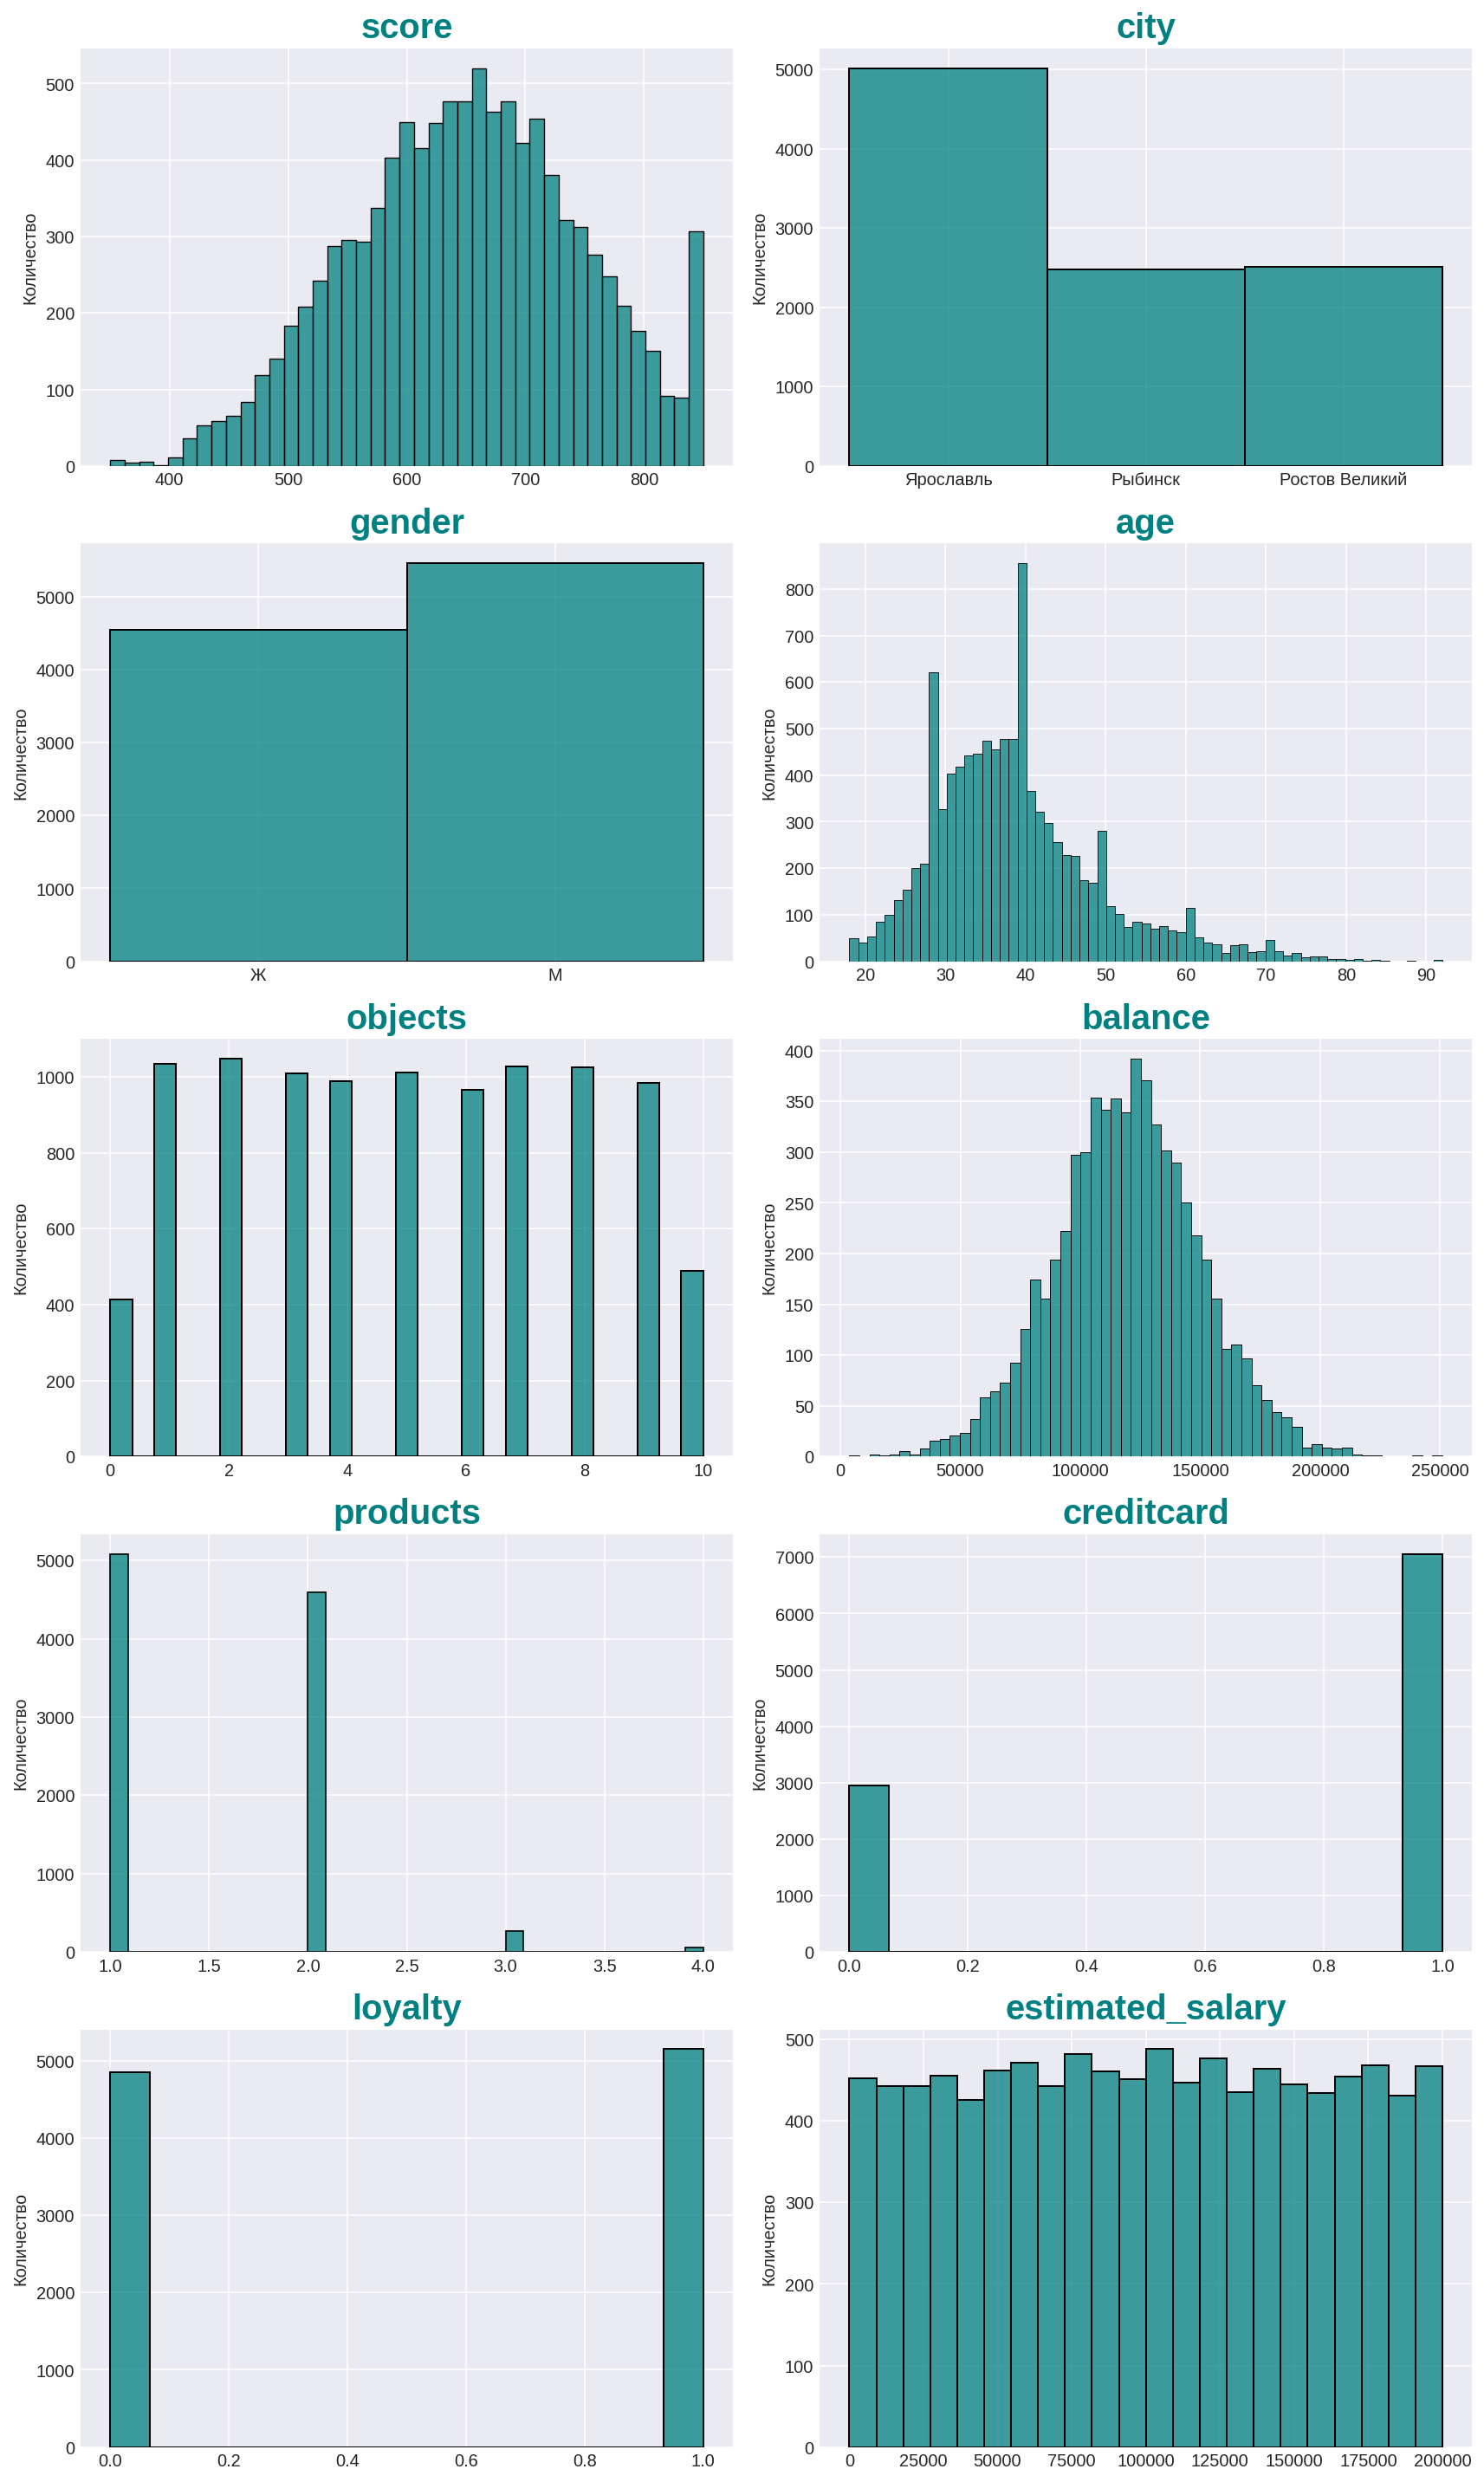

In [9]:
df_anon = df.drop('userid', axis=1)
fig, axes = plt.subplots(len(df_anon.columns.drop('churn'))//2, 2, figsize=(12,20))
fig.set_tight_layout('pad')
for i, col in enumerate(df_anon.columns.drop('churn')):
    ax = axes[i//2, i%2]
    ax.set_title(col, fontsize=20, fontweight='bold', color='teal')
    sns.histplot(x=df_anon[col], ax=ax, color='teal')
    ax.set_xlabel(None)
    ax.set_ylabel('Количество')

1. Распределение кредитного рейтинга в целом похоже на нормальное, немного смещенное влево и с выбросом количества клиентов с максимальным рейтингом.
2. Клиентов из Ярославля ожидаемо примерно в 2 раза больше, чем в других городах.
3. Среди клиентов чуть больше мужчин, чем женщин.
4. Распределение по возрасту смещено вправо: более молодые люди преобладают.
5. Количество объектов распределено равномерно.
6. Баланс счёта имеет практически идеальное нормальное распределение.
7. Примерно половина клиентов пользуется только 1 продуктом, чуть меньше — двумя. Клиентов, использующих более 2 продуктов, довольно мало.
8. Кредитная карта есть примерно у 70% клиентов.
9. Активно пользуются услугами только чуть больше половины клиентов.
10. Значение зарплаты распределено равномерно. Скорее всего, оценка сделана при помощи какого-то алгоритма. Возможно, алгоритм основывается на количестве объектов в собственности.

Проверим предположение про зарплату. Построим диаграмму размаха по количеству объектов недвижимости.

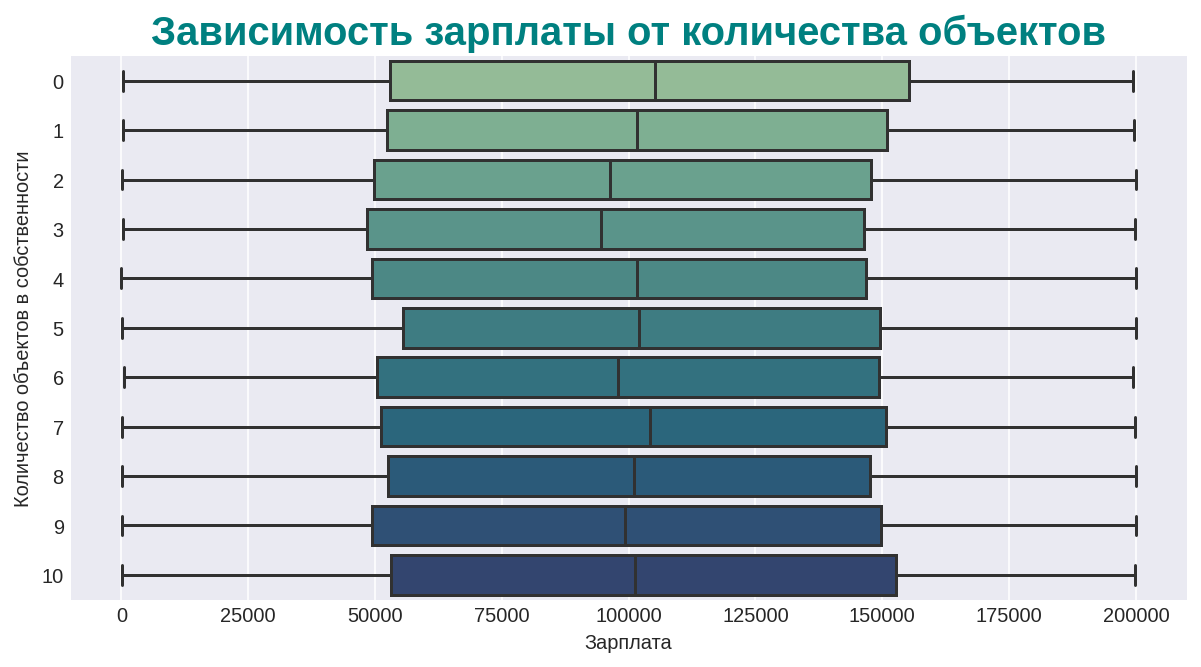

In [10]:
plt.figure(figsize=(10,5))
plt.title('Зависимость зарплаты от количества объектов', fontsize=20, fontweight='bold', color='teal')
sns.boxplot(x='estimated_salary', y='objects', data=df, orient='h', palette='crest')
plt.xlabel('Зарплата')
plt.ylabel('Количество объектов в собственности');

Графики получились очень похожими. Учитывая, что остальные параметры распределены неравномерно, можно сделать вывод, что данные о зарплате заполнялись независимо от имеющихся у нас данных.

Теперь посмотрим на средние значения и распределение признаков у ушедших и лояльных клиентов.

In [11]:
df.groupby('churn').mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.573390e+07,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


1. У ушедших пользователей немного ниже среднее значение кредитного рейтинга. Возможно, это случайность, и отличия не значимы. Это мы проверим позже.
2. Довольно сильно отличается возраст: ушедшие пользователи в среднем на 7 лет старше. Вопреки интуиции молодые пользователи более лояльны.
3. Сильно отличается активность использования. Ушедшие клиенты намного менее активно пользовались услугами банка.
4. Остальные показатели отличаются не очень сильно.

Посмотрим на распределение, чтобы сделать больше выводов.

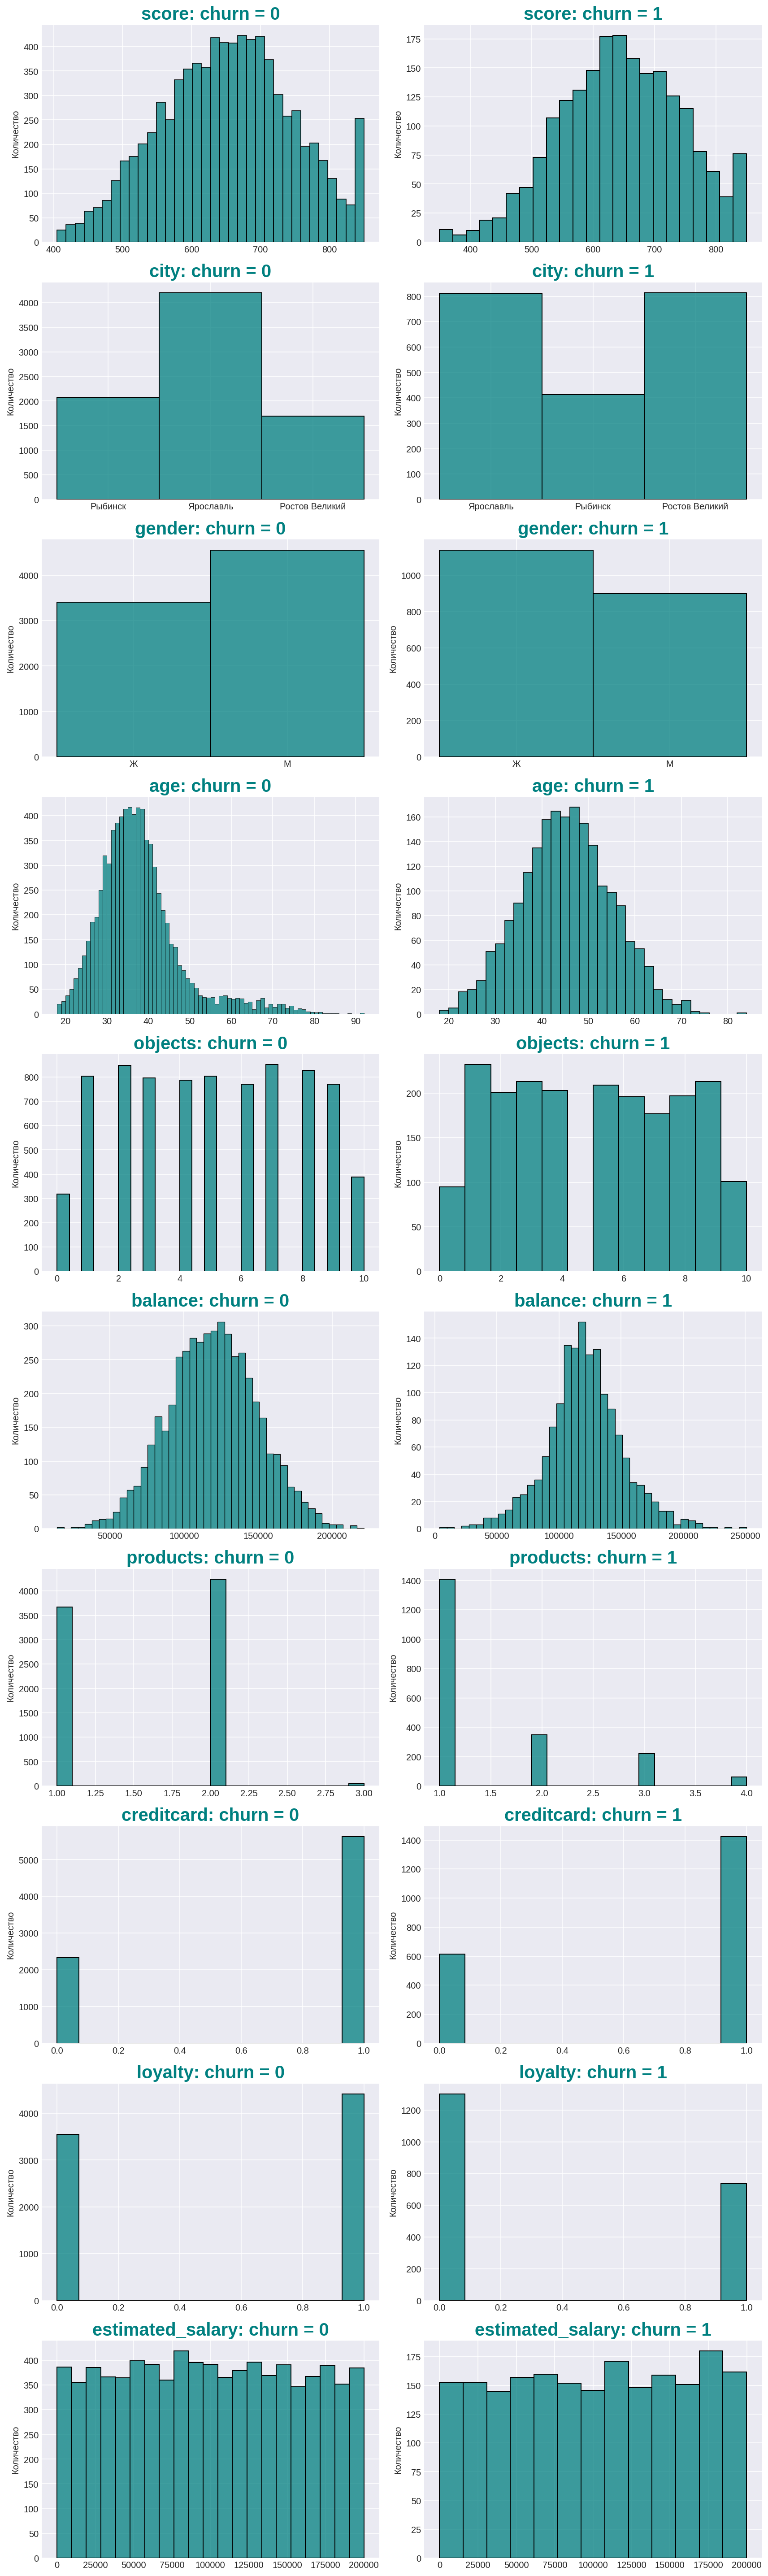

In [12]:
fig, axes = plt.subplots(len(df_anon.columns.drop('churn')), 2, figsize=(12,40))
fig.set_tight_layout('pad')
for i, col in enumerate(df_anon.columns.drop('churn')):
    axes[i,0].set_title(col+': churn = 0', fontsize=20, fontweight='bold', color='teal')
    axes[i,1].set_title(col+': churn = 1', fontsize=20, fontweight='bold', color='teal')
    sns.histplot(x=df_anon[df_anon['churn']==0][col], ax=axes[i,0], color='teal')
    sns.histplot(x=df_anon[df_anon['churn']==1][col], ax=axes[i,1], color='teal')
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel('Количество')
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Количество')

1. Распределение кредитного рейтинга в целом похоже, но у ушедших пользователей меньше пик на максимальном значении и чуть длиннее левый хвост: клиенты с низким рейтингом (меньше 400) ушли полностью.
2. Пользователи из Ростова относительно чаще уходят: в таком же количестве, как ярославцы, хотя среди клиентов банка их вдвое меньше.
3. Женщины чаще уходят, мужчины чаще остаются.
4. Более молодые клиенты остаются лояльны, более возрастные уходят.
5. Уходят клиенты со «средним» балансом. Люди с высоким и низким балансом продолжают пользоваться услугами банка, в то время как те, у кого баланс средний, часто уходят.
6. Все клиенты с 4 продуктами ушли, также ушли многие клиенты с 3 продуктами. Относительно реже остальных уходят клиенты с 2 продуктами, в то время как владельцы одного также массово уходят.
7. Вполне ожидаемо и логично, уходящие клиенты менее активно пользуются услугами банка.
8. Показатели зарплаты, количества объектов в собственности и наличия кредитной карты не отличаются у двух групп.

Посмотрим, сколько процентов пользователей ушли в зависимости от количество продуктов банка.

In [13]:
df.groupby('products')['churn'].mean()

products
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64

Выводы подтвердились. Реже всего уходят пользователи 2 продуктов.

Посмотрим подробнее на пользователей из Ростова Великого: отличаются ли они от клиентов из других городов.

In [14]:
df.groupby('city').mean()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
city,,,,,,,,,,
Ростов Великий,1.573329e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Рыбинск,1.573465e+07,651.333872,38.890997,5.032297,119814.985923,1.539362,0.694792,0.529673,99440.572281,0.166734
Ярославль,1.573339e+07,649.668329,38.511767,5.004587,119927.765597,1.530913,0.706621,0.516753,99899.180814,0.161548


Кажется, у них чуть выше средний возраст и немного ниже активность использования. Тем не менее они двое чаще уходят из банка. Посмотрим на распределение.

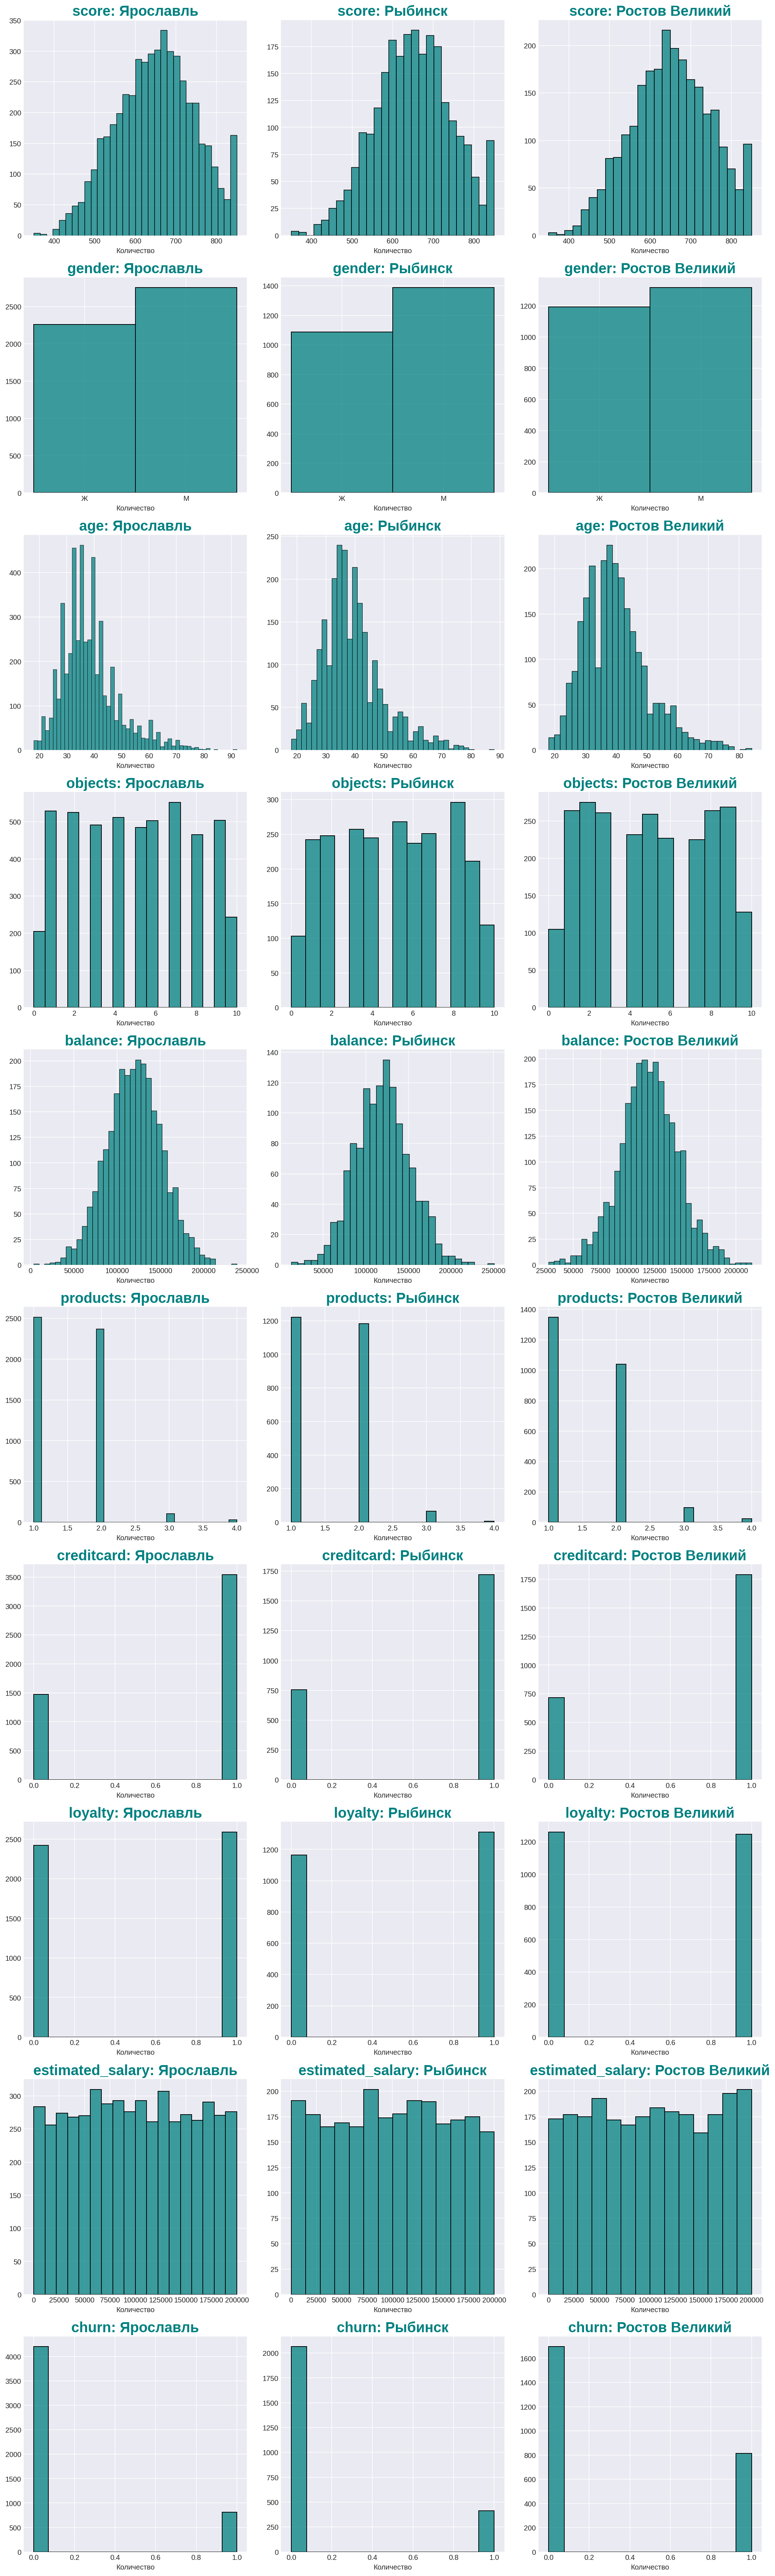

In [15]:
fig, axes = plt.subplots(len(df_anon.columns.drop('city')), 3, figsize=(15,50))
fig.set_tight_layout('pad')
for i, col in enumerate(df_anon.columns.drop('city')):
    for j, city in enumerate(df_anon['city'].unique()):
        sns.histplot(x=df_anon[df_anon['city']==city][col], ax=axes[i,j], color='teal')
        axes[i,j].set_title(col + ': ' + city, fontsize=20, fontweight='bold', color='teal')
        axes[i,j].set_xlabel('Количество')
        axes[i,j].set_ylabel(None)

Все графики у клиентов всех городов почти полностью совпадают. При этом клиенты из Ростова Великого разторгают контракт в два раза чаще. Возможно, есть внешние причины. Например, проблемное отделение или слабый менеджер. Нужно обязательно это проверить.

Продолжим рассматривать распределение признаков. Построим диаграммы размаха, чтобы явно видеть отличия мер центральной тенденции.

In [16]:
numeric_features = df[['score', 'age', 'objects', 'balance', 'products', 'estimated_salary', 'churn']]

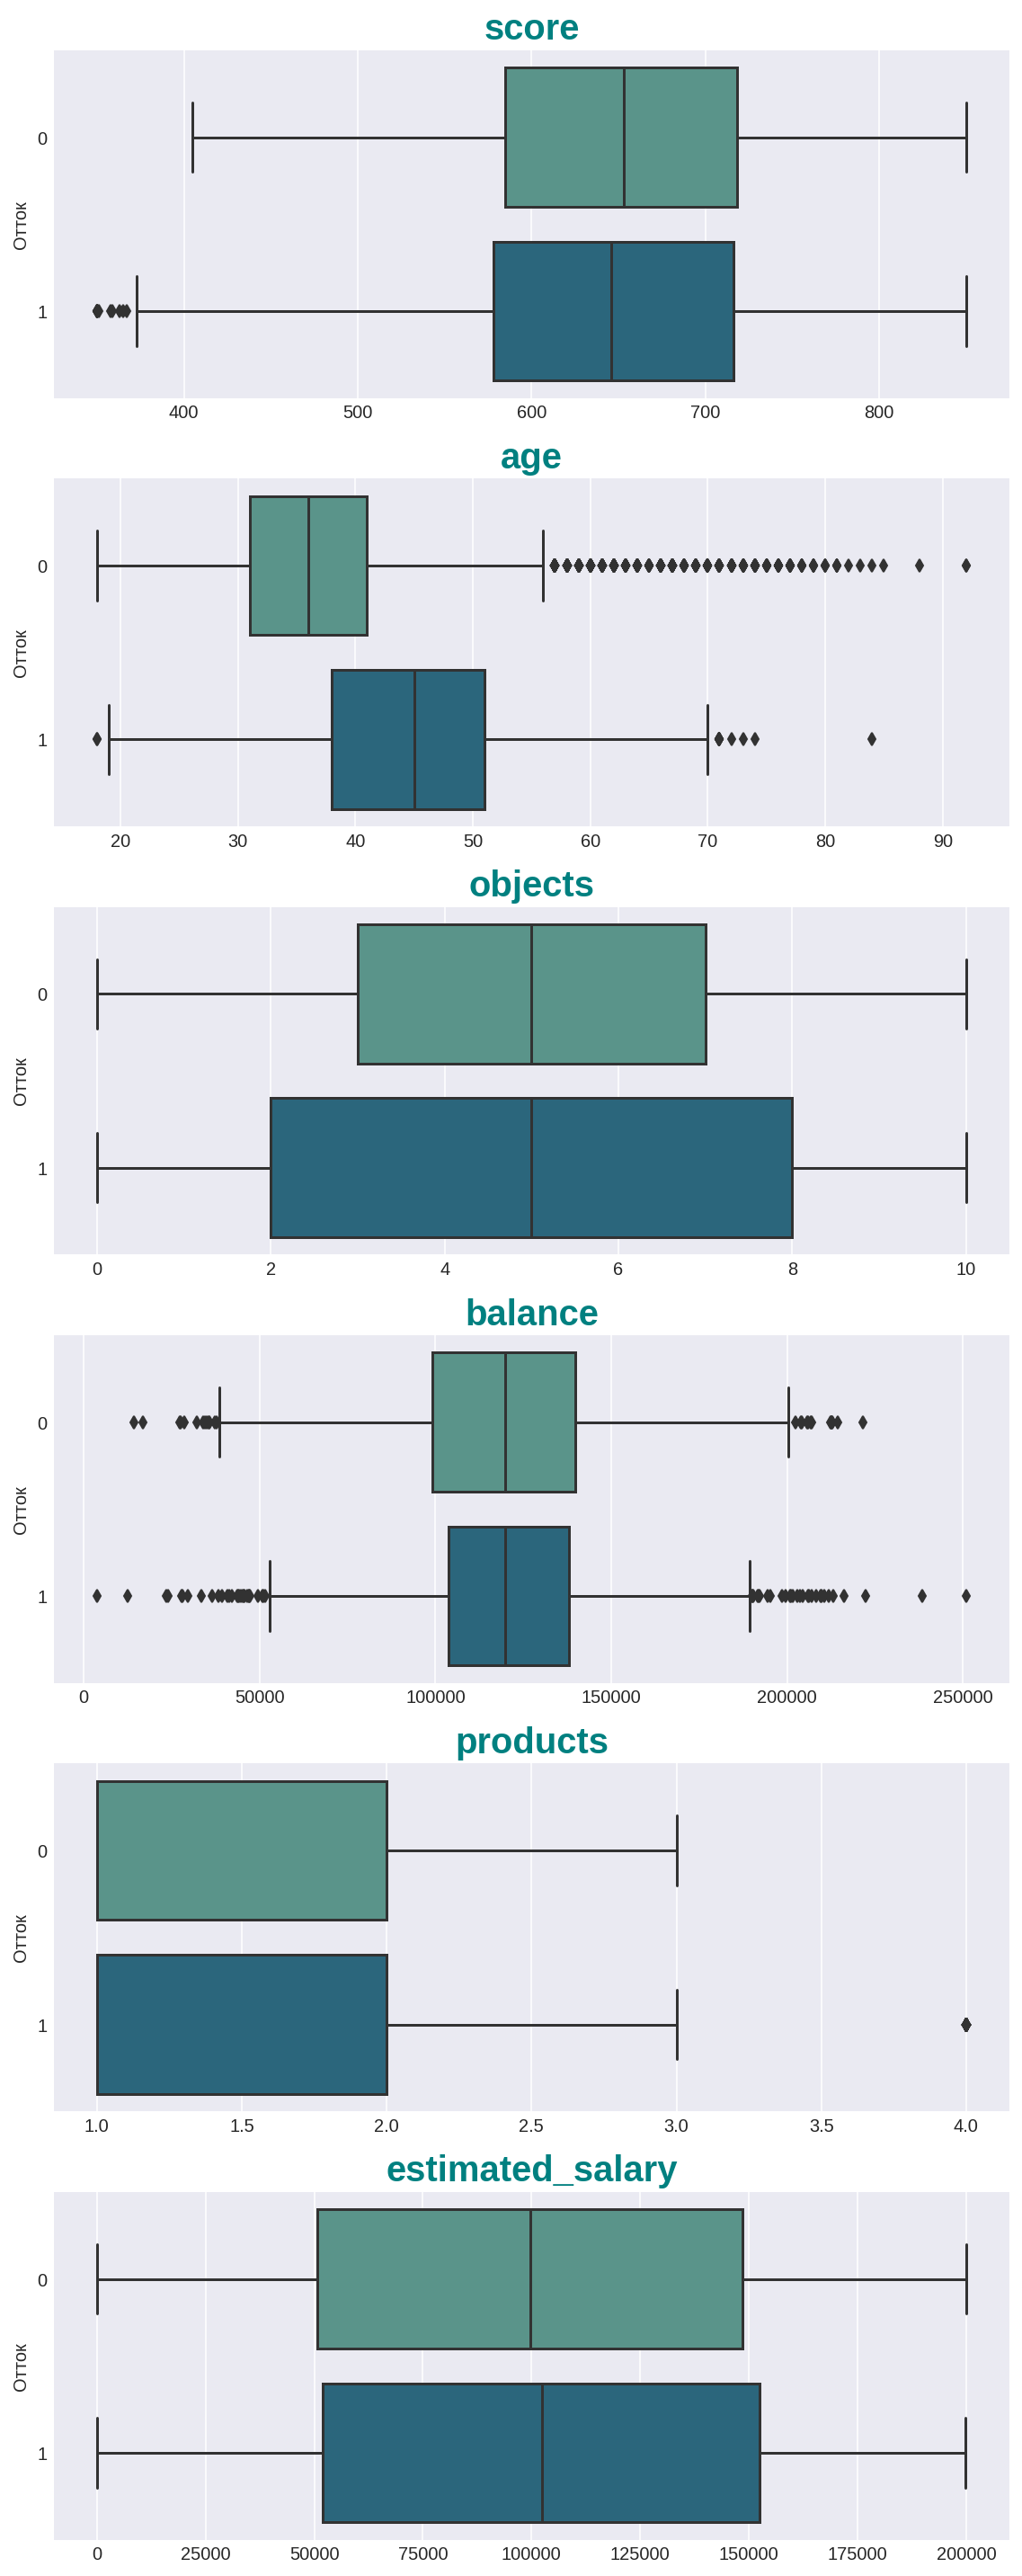

In [17]:
fig, axes = plt.subplots(len(numeric_features.columns.drop('churn')), 1, figsize=(8,20))
fig.set_tight_layout('pad')
for i, col in enumerate(numeric_features.columns.drop('churn')):
    axes[i].set_title(col, fontsize=20, fontweight='bold', color='teal')
    sns.boxplot(x=col, y='churn', data=numeric_features, orient='h', ax=axes[i], palette='crest')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Отток')

Выводы подтверждаются:
1. Люди с очень низким кредитным рейтингом уходят из банка. Возможно, банк сам разорвал с ними контракт из-за неуплаты кредита.
2. Много клиентов 40-50 лет уходит. Уходящие клиенты сильно старше тех, кто остается.

### Портрет клиента, склонного к уходу из банка

На основании всех выводов можно сказать следующее. Уходят из банка:

1. Клиенты старшего поколения (40+ лет)
2. Клиенты с низким кредитным рейтингом.
3. Много клиентов из Ростова Великого. Следует провести тщательную оценку работы местного отделения.
4. Женщины уходят чаще мужчин.
5. Реже всего уходят пользователи 2 продуктов, чаще — одного. Возможно, это люди, у которых был кредит, они его выплатили и ушли. Стоит предлагать пользователям 1 продукта приобрести ещё один, давая им выгодные и привлекательные условия. Например, людям, взявшим кредит, предлагать открыть дебетовую карту, уменьшая процент по кредиту.
6. Часто уходят пользователи, которые неактивно пользуются услугами банка. Можно попробовать увеличить долю активных пользователей, вводя программы лояльности (кешбэк, сниженные проценты для активных клиентов, бесплатное обслуживание при условии определенных месячных трат по карте и т.д.).

### Проверяем гипотезы

##### Гипотеза №1. Доходы ушедших и лояльных клиентов отличаются.

Для начала сформулируем нулевую и альтернативную гипотезы.  
$H_0$: Доходы ушедших и лояльных клиентов одинаковые.  
$H_1$: Доходы ушедших и лояльных клиентов отличаются.  
  
Так как распределение уровня зарплат **равномерное**, лучше применить **непараметрический тест** — U-критерий Манна-Уитни. Создадим два вектора, которые будем давать на вход функции.

In [18]:
salary_churned = df[df['churn']==1]['estimated_salary']
salary_loyal = df[df['churn']==0]['estimated_salary']

Заранее зафиксируем критический уровень значимости. Возьмем классический: 0.05. Дадим полученные векторы на вход функции `mannwhitneyu` библиотеки `scipy`.

In [19]:
st.mannwhitneyu(salary_churned, salary_loyal).pvalue

0.11352575465076892

Нулевую гипотезу отвергнуть не получилось. Доходы ушедших и лояльных клиентов не отличаются.

##### Гипотеза №2

Сформулируем другую гипотезу сами. Интересно посмотреть, отличается ли действительно кредитный рейтинг у ушедших и неушедших клиентов.  
$H_0$: Средний кредитный рейтинг у ушедших и лояльных клиентов одинаковый.  
$H_1$: Средний кредитный рейтинг у ушедших и лояльных клиентов отличается. 

Для начала посмотрим на распределение: является ли оно нормальным, это необходимое условие для проведения t-теста. Построим **qq-plot.**

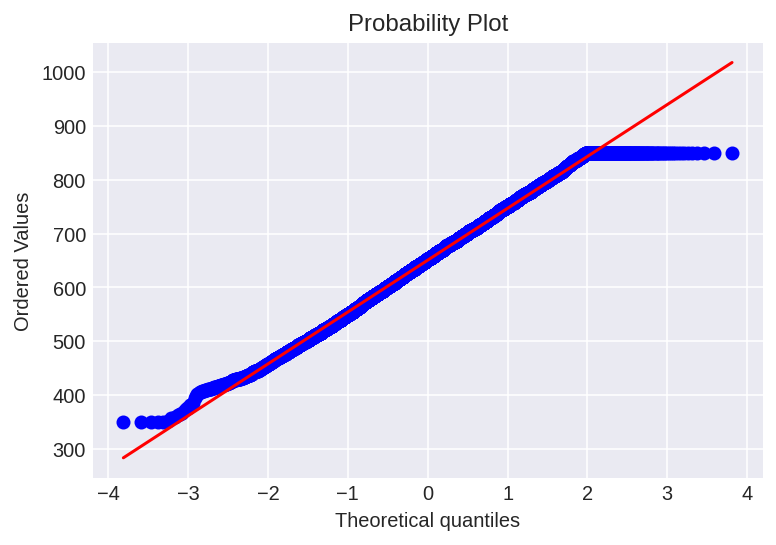

In [20]:
st.probplot(df['score'], dist='norm', plot=plt);

С правой стороны из-за большого количества клиентов с максимальным рейтингом случился перекос. Попробуем убрать клиентов с высшим кредитным рейтингом.

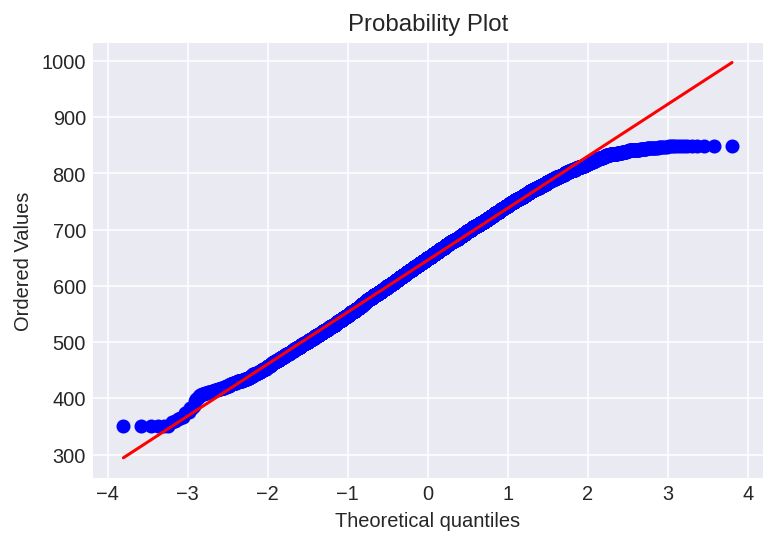

In [21]:
st.probplot(df[df['score']<850]['score'], dist='norm', plot=plt);

График немного сгладился. В целом, не считая перекоса с правой стороны, распределение похоже на нормальное. Разделим данные на два вектора в зависимости от факта ухода и посмотрим на распределение.

In [22]:
score_churned = df[(df['churn']==1)&(df['score']<850)]['score']
score_loyal = df[(df['churn']==0)&(df['score']<850)]['score']

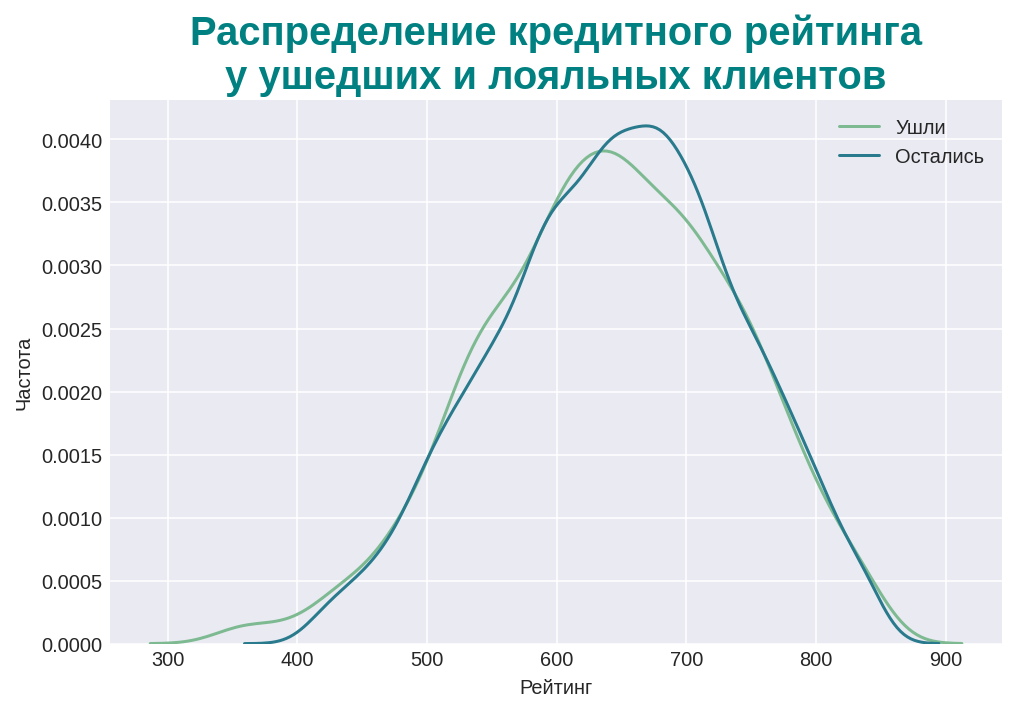

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(score_churned, label='Ушли', color=sns.palettes.color_palette('crest')[0])
sns.kdeplot(score_loyal, label='Остались', color=sns.palettes.color_palette('crest')[3])
plt.title('Распределение кредитного рейтинга\nу ушедших и лояльных клиентов', fontsize=20, fontweight='bold', color='teal')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.legend();

Распределение напоминает нормальное, t-критерий Стьюдента даст надежный результат. Теперь проверим, отличаются ли дисперсии у выборок. Нулевая гипотеза, как обычно, будет гласить, что дисперсии одинаковые. Критический уровень значимости — 0.05.

In [24]:
st.levene(score_churned, score_loyal)

LeveneResult(statistic=6.931298452631327, pvalue=0.00848335242763898)

Дисперсии, скорее всего, различаются. Добавим этот параметр в функцию `ttest_ind`.

Критический уровень значимости также оставим на уровне 0.05.

In [25]:
st.ttest_ind(score_churned, score_loyal, equal_var=False).pvalue

0.011555786533994295

p-уровень значимости меньше критического уровня, значит, мы отвергаем нулевую гипотезу о равенстве средних.

#### Вывод

1. Доходы клиентов, продолжающих пользоваться услугами банка, и клиентов, ушедших из банка, **не отличаются.**
2. Средний кредитный рейтинг клиентов, продолжающих пользоваться услугами банка, и клиентов, ушедших из банка, **отличается.**

### Итоговый вывод

1. В Ростове Великом проблема. Клиенты оттуда уходят вдвое чаще, хотя в данных нет предпосылок для этого. Следует проверить эффективность местного отделения и попробовать снизить скорость оттока.
2. Более взрослые люди чаще уходят из банка. Можно попробовать программы лояльности: накопление пенсии, повышенный кешбэк на определённые услуги. Возможно, также поможет автоматизация оплаты коммунальных услуг через мобильный банк.
3. Клиенты с 3 продуктами почти всегда уходят, с 4 — вообще всегда. Значит, не стоит навязывать слишком много услуг.
4. 28% клиентов с 1 продуктом также склонны к уходу. Возможно, это были люди, взявшие кредит, которые ушли после его выплаты. Возможно также, что это клиенты, которым не хватило некого «якоря», и будь у них 2 продукта, они бы не стали уходить.
5. Клиенты с 2 продуктами — самые лояльные. Значит, нужно попробовать убедить пользователей 1 продукта приобрести ещё один. Кредитную карту с пониженным процентом или дебетовую с бесплатным обслуживанием. Или, например, накопительный счёт.
6. Чаще уходят пользователи, неактивно пользующиеся услугами банка. Стоит попробовать простимулировать их активность. Например, за счёт программ лояльности: повышенного кешбэка, бесплатного обслуживания при условии определенных месячных трат по дебетовой карте, пониженного процента по кредитной карте.
7. Уровень зарплаты у уходящих и лояльных клиентов значимо не отличается.
8. Кредитный рейтинг у уходящих клиентов немного ниже, и это различие статистически значимо.